# <font color='HotPink'>**Data Mining Project 2025/2026 - Group 94** <br></font> Amazing International Airlines Inc.


**Diogo Henrique Lopes de Carvalho** ***(20221935)***

**Maria Luiza Salum Alves Corrêa** ***(20221902)***

**Ricardo Miguel Silva Martins Pereira** ***(20250343)***

*** 

## **Index**

***First Delivery***
1. [Business Understanding](#1)
1. [Imports](#2)
1. [Data Understanding](#3)
    1. [The Dataset](#3_1)
1. [Data Preparation](#4)
    1. [Data Cleaning](#4_1)
    1. [Variable Classification](#4_2)
    1. [Summary Statistics](#4_3)
    1. [Data Visualisation](#4_4)
    1. [Feature Engineering](#4_5)

***Second Delivery***

5. [Clustering](#5)
5. [Evaluation](#6)
5. [Suggestions](#7)

#
***

## 1. <a id="1">Business Understanding</a>

Our client, **Amazing International Airlines Inc.**, tasked our consulting team with the analysis of their customer loyalty membership data and corresponding flight activity collected over a three-year period. <br>

The goal of our analysis is to create useful insights through a segmentation process that consists of grouping and viewing the available data by different lenses; such as *economic contribution*, *behaviours in purchases and travels*, and *demographic divisions*. <br>

After sharing the insights, our team will evaluate the results and give AIAI suggestions on how to adapt their services, rewards and communications to meet the needs of the most relevant groups found.

***

## 2. <a id="2">Imports</a>

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from itertools import product


# import itertools

***

## 3. <a id="3">Data Understanding</a>

### 1. <a id="3_1">The Dataset</a>

The dataset given to our team consists of three `csv` files:

- `DM_AIAI_CustomerDB.csv`

*Three (3) years of data related to Customers in the Loyalty Program*
- `DM_AIAI_FlightsDB.csv`

*Three (3) years of data related to Flights of the Loyalty Program Members*
- `DM_AIAI_Metadata.csv`

*Description of the Variables in the CustomerDB and FlightDB Files*

In [306]:
customerDB = pd.read_csv(r'data\DM_AIAI_CustomerDB.csv', sep=',')
flightDB = pd.read_csv(r'data\DM_AIAI_FlightsDB.csv', sep=',')
metadata = pd.read_csv(r'data\DM_AIAI_Metadata.csv', sep=';')

customerDB_copy = customerDB.copy()
flightDB_copy = flightDB.copy()

In [307]:
pd.set_option('display.max_colwidth', None)  # To see full descriptions
metadata

,CustomerDB,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Variable,Description,NaN
1,NaN,Loyalty#,Unique customer identifier for loyalty program members,NaN
2,NaN,First Name,Customer's first name,NaN
3,NaN,Last Name,Customer's last name,NaN
4,NaN,Customer Name,Customer's full name (concatenated),NaN
5,NaN,Country,Customer's country of residence,NaN
6,NaN,Province or State,Customer's province or state,NaN
7,NaN,City,Customer's city of residence,NaN
8,NaN,Latitude,Geographic latitude coordinate of customer location,NaN
9,NaN,Longitude,Geographic longitude coordinate of customer location,NaN


#### Initial Conclusions
*What conclusions can we make from the metadata?*

##### Customer DB

**Useful:**
- `Loyalty#`: Will be used. Connects Customer's and Flights' information.

**Will be Dropped:**
- `First Name`, `Last Name`, `Customer Name`: First two are redundant since we have the full name, but this information is irrelevant for clustering anyways. We'll drop everything after data cleaning. *(Keeping `Customer Name` for now to check something with the IDs)*
- `Latitude`, `Longitude`, `Postal Code`: No need for specific customer location. *(Spoilers: We checked, some coordinates lead to nowhere and just make no sense overall)*

**No Conclusions:** <br>
*May be relevant. No conclusions about data quality from metadata.*
- `Country`
- `Province or State`
- `City`
- `Postal Code`
- `Gender`
- `Education`
- `Location Code`
- `Income`
- `Marital Status`
- `Loyalty Status`
- `EnrollmentDataOpening`
- `CancellationDate`
- `Customer Lifetime Value`
- `EnrollmentType`

In [308]:
customerDB_copy.drop(columns=['First Name', 'Last Name', 'Latitude', 'Longitude', 'Postal code'], inplace=True)
customerDB_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   Customer Name            16921 non-null  object 
 3   Country                  16921 non-null  object 
 4   Province or State        16921 non-null  object 
 5   City                     16921 non-null  object 
 6   Gender                   16921 non-null  object 
 7   Education                16921 non-null  object 
 8   Location Code            16921 non-null  object 
 9   Income                   16901 non-null  float64
 10  Marital Status           16921 non-null  object 
 11  LoyaltyStatus            16921 non-null  object 
 12  EnrollmentDateOpening    16921 non-null  object 
 13  CancellationDate         2310 non-null   object 
 14  Customer Lifetime Valu

From the non-null count, we can see that there are only three variables with missing values: `Income`, `CancellationDate` and `Customer Lifetime Value`. Having null values in `CancellationDate` clearly makes sense as we don't expect all customers in the dataset to have cancelled their membership. For `Income` and `Customer Lifetime Value`, we'll try to understand the reason later.

In [309]:
# There's a random column with no name, let's drop it
customerDB_copy.drop(columns=['Unnamed: 0'], inplace=True)

##### Flights DB

**Useful:**
- `Loyalty#`: Will be used. Connects Customer's and Flights' information.

**Will be Dropped:**
- `YearMonthDate`: Contains the same info as `Month` and `Year` with a constant date.
- `DollarCostPointsRedeemed`: Redundant. `PointsRedeemed` gives the same information.

**No Conclusions:** <br>
*May be relevant. No conclusions about data quality from metadata.*
- `Year`
- `Month`
- `NumFlights`
- `NumFlightsWithCompanions`*
- `DistanceKM`
- `PointsAccumulated`
- `PointsRedeemed`

**We will assume `NumFlightsWithCompanions` is also a "count by month" even though it's not mentioned in the metadata.*

In [310]:
flightDB_copy.drop(columns=['YearMonthDate', 'DollarCostPointsRedeemed'], inplace=True)
flightDB_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   NumFlights                608436 non-null  float64
 4   NumFlightsWithCompanions  608436 non-null  float64
 5   DistanceKM                608436 non-null  float64
 6   PointsAccumulated         608436 non-null  float64
 7   PointsRedeemed            608436 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 37.1 MB


There are no null values in any variable. We'll take a closer look into the dataset when preparing the data. There might be missing values that are non-null since they could look like "-", "Null", "Missing", etc.

***

## 4. <a id="4">Data Preparation</a>

There's a possibility of having some rows that the only plausible option is to remove from the dataset due to uncorrectable errors. For this reason, we are going to define variables to keep track of how many rows we are dropping.

We are going to assume that an acceptable threshold is 5% of the dataset.

In [311]:
customer_dropped_rows = 0
customer_original_rows = customerDB.shape[0]
customer_dropped_percentage = 0
customer_available_to_drop = (customer_original_rows * 0.05) - customer_dropped_rows
print(f"Available rows to drop in customerDB: {customer_available_to_drop} ({(customer_available_to_drop/customer_original_rows)*100:.0f}%)")

flight_dropped_rows = 0
flight_original_rows = flightDB.shape[0]
flight_dropped_percentage = 0
flight_available_to_drop = (flight_original_rows * 0.05) - flight_dropped_rows
print(f"Available rows to drop in flightDB: {flight_available_to_drop} ({(flight_available_to_drop/flight_original_rows)*100:.0f}%)")

Available rows to drop in customerDB: 846.0500000000001 (5%)
Available rows to drop in flightDB: 30421.800000000003 (5%)


In [312]:
customerDB_copy.head()

,Loyalty#,Customer Name,Country,Province or State,City,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Cecilia Householder,Canada,Ontario,Toronto,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,549612,Dayle Menez,Canada,Alberta,Edmonton,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,429460,Necole Hannon,Canada,British Columbia,Vancouver,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,608370,Queen Hagee,Canada,Ontario,Toronto,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,530508,Claire Latting,Canada,Quebec,Hull,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [313]:
# Seeing the different values in each variable and if they're less than 15, printing them bellow
for variable in customerDB_copy.columns:
    print(f"{variable}: {customerDB_copy[variable].nunique()} unique values\n")
    if customerDB_copy[variable].nunique() < 15:
        print(f"{customerDB_copy[variable].value_counts()}\n")

Loyalty#: 16757 unique values

Customer Name: 16921 unique values

Country: 1 unique values

Country
Canada    16921
Name: count, dtype: int64

Province or State: 11 unique values

Province or State
Ontario                 5468
British Columbia        4416
Quebec                  3311
Alberta                 1008
Manitoba                 676
New Brunswick            652
Nova Scotia              541
Saskatchewan             412
Newfoundland             258
Yukon                    112
Prince Edward Island      67
Name: count, dtype: int64

City: 29 unique values

Gender: 2 unique values

Gender
female    8497
male      8424
Name: count, dtype: int64

Education: 5 unique values

Education
Bachelor                10586
College                  4283
High School or Below      792
Doctor                    742
Master                    518
Name: count, dtype: int64

Location Code: 3 unique values

Location Code
Suburban    5716
Rural       5668
Urban       5537
Name: count, dtype: int64

Inc

In [314]:
flightDB_copy.head()

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
0,413052,2021,12,2.0,2.0,9384.0,938.0,0.0
1,464105,2021,12,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,10.0,3.0,14745.0,1474.0,0.0
3,185013,2021,12,16.0,4.0,26311.0,2631.0,3213.0
4,216596,2021,12,9.0,0.0,19275.0,1927.0,0.0


In [315]:
# Seeing the different values in each variable and if they're less than 15, printing them bellow
for variable in flightDB_copy.columns:
    print(f"{variable}: {flightDB_copy[variable].nunique()} unique values\n")
    if flightDB_copy[variable].nunique() < 15:
        print(f"{flightDB_copy[variable].value_counts()}\n")

Loyalty#: 16737 unique values

Year: 3 unique values

Year
2021    202812
2020    202812
2019    202812
Name: count, dtype: int64

Month: 12 unique values

Month
12    50703
6     50703
5     50703
4     50703
3     50703
2     50703
1     50703
11    50703
10    50703
9     50703
8     50703
7     50703
Name: count, dtype: int64

NumFlights: 41 unique values

NumFlightsWithCompanions: 22 unique values

DistanceKM: 66762 unique values

PointsAccumulated: 37064 unique values

PointsRedeemed: 8146 unique values



### 1. <a id="4_1">Data Cleaning</a>

##### Loyalty# *(+ Customer Name)*

In [316]:
# Confirming how many rows have repeated Loyalty#
print(customerDB_copy['Loyalty#'].duplicated().sum())
# Confirming if the whole row is duplicated
print(customerDB_copy.duplicated().sum())

164
0


We kept `Customer Name` before so we could check if they're the same for repeated Loyalty IDs, but this is not the case as the unique values count is 16921. This means that we cannot use the name to fix the issue with duplicated IDs (they're not the same person).

We could assign new random values to the repeated IDs, but the FlightsDB dataset is connected to each customer through this variable, so it makes no sense to change it in the CustomerDB since this would mean that they have no associated flights.

We'll now drop `Customer Name` and remove the rows with repeated Loyalty ID.

In [317]:
# Dropping Customer Name
customerDB_copy.drop(columns=['Customer Name'], inplace=True)

In [318]:
# Keeping only one of the duplicated rows and adding the number of dropped rows to the counter
for loyalty_id in customerDB_copy['Loyalty#'][customerDB_copy['Loyalty#'].duplicated()]: # for each duplicated Loyalty#
    duplicated_rows = customerDB_copy[customerDB_copy['Loyalty#'] == loyalty_id] # getting the duplicated rows
    customerDB_copy.drop(duplicated_rows.index[1:], inplace=True) # dropping from the second to the last (just in case there are more than 2)
    customer_dropped_rows += len(duplicated_rows) - 1 # adding the number of dropped rows to the counter
    
customer_dropped_percentage = customer_dropped_rows / customer_original_rows * 100
customer_available_to_drop -= customer_dropped_rows
print(f"Total dropped rows: {customer_dropped_rows}, which is {customer_dropped_percentage:.2f}% of the original dataset. We can still drop {customer_available_to_drop} rows.")

Total dropped rows: 164, which is 0.97% of the original dataset. We can still drop 682.0500000000001 rows.


##### Country

`Country` is a constant feature (Canada). We'll drop this column.

In [319]:
# Dropping Country 
customerDB_copy.drop(columns=['Country'], inplace=True)

#### City

Checking if all cities in the list are Canadian cities.

In [320]:
customerDB_copy['City'].unique()

array(['Toronto', 'Edmonton', 'Vancouver', 'Hull', 'Whitehorse',
       'Trenton', 'Montreal', 'Dawson Creek', 'Quebec City', 'Moncton',
       'Fredericton', 'Ottawa', 'Tremblant', 'Calgary', 'Whistler',
       'Thunder Bay', 'Peace River', 'Winnipeg', 'Sudbury',
       'West Vancouver', 'Halifax', 'London', 'Victoria', 'Regina',
       'Kelowna', "St. John's", 'Kingston', 'Banff', 'Charlottetown'],
      dtype=object)

#### Income - Customer Lifetime Value

We'll see if the null values in `Income` are related to the null values in `Customer Lifetime Value`.

In [321]:
income_null = customerDB_copy[customerDB_copy['Income'].isnull()]
clv_null = customerDB_copy[customerDB_copy['Customer Lifetime Value'].isnull()]
income_clv_null = customerDB_copy[(customerDB_copy['Income'].isnull()) & (customerDB_copy['Customer Lifetime Value'].isnull())]
print(f"Income null values: {len(income_null)}\nCLV null values: {len(clv_null)}\nBoth null values: {len(income_clv_null)}")

Income null values: 20
CLV null values: 20
Both null values: 20


In [322]:
# seeing these customers in customerDB_copy
customerDB_copy.loc[income_clv_null.index]

,Loyalty#,Province or State,City,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,999987,New Brunswick,Fredericton,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,999988,Quebec,Montreal,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,999989,Ontario,Trenton,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,999990,New Brunswick,Moncton,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,999991,New Brunswick,Fredericton,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,999992,Ontario,Toronto,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,999993,British Columbia,Dawson Creek,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,999994,Ontario,Ottawa,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,999995,Ontario,Ottawa,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16910,999996,Ontario,Toronto,female,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard


Now we know they're the same customers.

Also, we can see that each one of these customers have the same `EnrollmentDateOpening` and `CancellationDate`, which makes us believe that they will have no relevant information in the flight dataset. If they don't, we'll just drop the rows.

In [323]:
# seeing if there are any Loyalty# in customerDB_copy that are not in flightDB_copy
missing_loyalty = customerDB_copy.index.difference(flightDB_copy['Loyalty#'].unique())
# seeing if they're the ones with null values in Customer Lifetime Value
clv_null_loyalty = customerDB_copy[customerDB_copy['Customer Lifetime Value'].isnull()].index
meets = []
for index in missing_loyalty:
    if index in clv_null_loyalty:
        meets.append(index)
print(f'Loyalty# missing in flightDB_copy and null CLV/Income: \n{meets}\nTotal: {len(meets)}')

Loyalty# missing in flightDB_copy and null CLV/Income: 
[16901, 16902, 16903, 16904, 16905, 16906, 16907, 16908, 16909, 16910, 16911, 16912, 16913, 16914, 16915, 16916, 16917, 16918, 16919, 16920]
Total: 20


As expected, they have no flight information at all! Let's drop them.

In [324]:
customerDB_copy.drop(index=meets, inplace=True)
customer_dropped_rows += len(meets)
customer_dropped_percentage = customer_dropped_rows / customer_original_rows * 100
customer_available_to_drop -= len(meets)
print(f"Total dropped rows: {customer_dropped_rows}, which is {customer_dropped_percentage:.2f}% of the original dataset. We can still drop {customer_available_to_drop} rows.")

Total dropped rows: 184, which is 1.09% of the original dataset. We can still drop 662.0500000000001 rows.


Let's see the values equal to zero...

In [325]:
income_zero = customerDB_copy[customerDB_copy['Income'] == 0]
clv_zero = customerDB_copy[customerDB_copy['Customer Lifetime Value'] == 0]
income_clv_zero = customerDB_copy[(customerDB_copy['Income'] == 0) & (customerDB_copy['Customer Lifetime Value'] == 0)]
print(f"Income zero values: {len(income_zero)}\nCLV zero values: {len(clv_zero)}\nBoth zero values: {len(income_clv_zero)}\n")
print(income_zero['Customer Lifetime Value'])

Income zero values: 4238
CLV zero values: 0
Both zero values: 0

1         3839.61
2         3839.75
3         3839.75
6         3857.95
13        3871.07
           ...   
16885    44771.30
16891    52811.49
16895    61134.68
16896    61850.19
16898    74228.52
Name: Customer Lifetime Value, Length: 4238, dtype: float64


We'll try to understand if there's a pattern for the 0€ income values in the Data Visualisation section. Maybe a specific type of customer decided to keep their income a secret..? We don't know yet, but we can see that these customers, even though they have no revealed `Income`, have an estimated CLV.

#### CancellationDate

Checking if there are dates in `CancellationDate` that are earlier than dates in `EnrollmentDateOpening`.

In [326]:
customerDB_copy['EnrollmentDateOpening'] = pd.to_datetime(customerDB_copy['EnrollmentDateOpening'], errors='coerce')
customerDB_copy['CancellationDate'] = pd.to_datetime(customerDB_copy['CancellationDate'], errors='coerce')
invalid_dates = customerDB_copy[customerDB_copy['CancellationDate'] <= customerDB_copy['EnrollmentDateOpening']]
print(f"Number of rows with CancellationDate before EnrollmentDateOpening: {len(invalid_dates)}")
invalid_dates

Number of rows with CancellationDate before EnrollmentDateOpening: 203


,Loyalty#,Province or State,City,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
72,357549,British Columbia,Whistler,female,Bachelor,Rural,60817.0,Single,Star,2021-09-21,2019-05-21,3964.73,Standard
77,265297,Manitoba,Winnipeg,female,Bachelor,Urban,39101.0,Married,Star,2021-07-17,2019-03-17,3978.67,Standard
176,845613,Quebec,Montreal,male,Bachelor,Urban,30598.0,Married,Star,2021-10-13,2019-06-13,4198.03,Standard
210,830547,British Columbia,Vancouver,male,Bachelor,Rural,26245.0,Single,Star,2021-05-11,2019-01-11,4271.20,Standard
304,514900,Ontario,Toronto,female,Bachelor,Urban,80892.0,Married,Star,2021-07-20,2019-03-20,4425.91,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,584796,British Columbia,Vancouver,male,Bachelor,Rural,59853.0,Single,Star,2021-08-18,2019-04-18,19454.41,Standard
16522,774931,British Columbia,Whistler,female,Bachelor,Rural,33588.0,Married,Star,2021-07-21,2019-03-21,19731.34,Standard
16551,275807,Manitoba,Winnipeg,female,Bachelor,Urban,71467.0,Divorced,Star,2021-10-18,2019-06-18,20446.60,Standard
16634,433307,Manitoba,Winnipeg,male,Bachelor,Suburban,80540.0,Married,Star,2021-08-03,2019-04-03,22758.91,Standard


In [327]:
# Seeing the total flight dataset data per customer in the invalid_dates
invalid_loyalty_numbers = invalid_dates['Loyalty#'].values
invalid_flights = flightDB_copy[flightDB_copy['Loyalty#'].isin(invalid_loyalty_numbers)]
invalid_flights_grouped = invalid_flights.groupby('Loyalty#').agg({
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum',
    'PointsAccumulated': 'sum'
}).reset_index()
invalid_flights_grouped

,Loyalty#,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated
0,102615,8.0,0.0,22608.0,2260.0
1,103362,9.0,1.0,11840.0,1184.0
2,103985,18.0,6.0,41615.0,4160.0
3,116562,35.0,2.0,80284.0,8027.0
4,122858,32.0,7.0,81345.0,8133.0
...,...,...,...,...,...
198,978040,33.0,13.0,73117.0,7309.0
199,982543,10.0,3.0,14229.0,1422.0
200,985707,56.0,24.0,92757.0,9273.0
201,992499,11.0,2.0,28226.0,2822.0


Since we have relevant flight data for customers with invalid dates, we are going to assume that the customer had a previous membership, cancelled it, and then decided to become a member once again.

For this reason, we're just going to replace these dates in `CancellationDate` with Na.

*We're not adding this to the dropped rows count as we only did a replacement.*

In [328]:
for row in invalid_dates:
    customerDB_copy.loc[invalid_dates.index, 'CancellationDate'] = pd.NaT

#### CustomerDB - FlightDB Relation

In [329]:
flightDB_copy.shape[0]/customerDB_copy.shape[0]

36.352751389137836

Every customer in the loyalty program should have a row for each one of the 36 months in the dataset. The number above shows that there are more months registered than customers. We'll take a look into this.

In [330]:
# for each loyalty number, counting how many rows there are in the flights dataset
flight_counts = flightDB_copy['Loyalty#'].value_counts()
loyalty_over_36 = flight_counts[flight_counts > 36]
print(f"Number of Loyalty# with more than 36 rows: {len(loyalty_over_36)}")

# for each loyalty number, counting how many months are missing in the flights dataset
months_per_loyalty = flightDB_copy.groupby('Loyalty#').size()
missing_months = months_per_loyalty[months_per_loyalty < 36]
print(f"Number of Loyalty# with less than 36 months: {len(missing_months)}")

Number of Loyalty# with more than 36 rows: 163
Number of Loyalty# with less than 36 months: 0


In [331]:
# showing the rows for one Loyalty# with more than 36 rows
flightDB_copy[flightDB_copy['Loyalty#'] == loyalty_over_36.index[0]]

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
5211,678205,2020,5,0.0,0.0,0.0,0.0,0.0
11558,678205,2020,5,0.0,0.0,0.0,0.0,0.0
19366,678205,2020,5,0.0,0.0,0.0,0.0,0.0
21029,678205,2020,4,0.0,0.0,0.0,0.0,0.0
22477,678205,2020,4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
585497,678205,2019,11,0.0,0.0,0.0,0.0,0.0
585498,678205,2019,11,0.0,0.0,0.0,0.0,0.0
602397,678205,2019,12,0.0,0.0,0.0,0.0,0.0
602398,678205,2019,12,0.0,0.0,0.0,0.0,0.0


For each repeated month, we'll keep the row with the less amount of null values.

In [332]:
non_null_counts = flightDB_copy.notnull().sum(axis=1) # counting non-null values in each row
row_to_keep = (flightDB_copy.assign(non_null_count=non_null_counts).groupby(['Loyalty#', 'Year', 'Month'])['non_null_count'].idxmax()) # getting the index of the row with the most non-null values for each Loyalty#, Year, Month
flightDB_copy = flightDB_copy.loc[row_to_keep].copy() # keeping only the rows with the most non-null values

# updating the dropped rows counter
flight_dropped_rows = flight_original_rows - flightDB_copy.shape[0]
flight_available_to_drop -= flight_dropped_rows

print(f"Total dropped rows: {flight_dropped_rows}, which is {(flight_dropped_rows/flight_original_rows)*100:.2f}% of the original dataset. We can still drop {flight_available_to_drop} rows.")

Total dropped rows: 5904, which is 0.97% of the original dataset. We can still drop 24517.800000000003 rows.


*Side comment: the same percentage of rows was dropped when we were cleaning the duplicate customers... This could mean that the people dropped in this previous step had an already existing ID assigned to them when creating their account. This would have mixed their data with the other customer with the existing ID.*

*There's no way of identifying which flight information is related to each one of these customers, so we'll need to work with what we have.*

In [333]:
# for each loyalty number, counting how many rows there are in the flights dataset
flight_counts = flightDB_copy['Loyalty#'].value_counts()
loyalty_over_36 = flight_counts[flight_counts > 36]
print(f"Number of Loyalty# with more than 36 rows: {len(loyalty_over_36)}")

# for each loyalty number, counting how many months are missing in the flights dataset
months_per_loyalty = flightDB_copy.groupby('Loyalty#').size()
missing_months = months_per_loyalty[months_per_loyalty < 36]
print(f"Number of Loyalty# with less than 36 months: {len(missing_months)}")

Number of Loyalty# with more than 36 rows: 0
Number of Loyalty# with less than 36 months: 0


### 2. <a id="4_2">Variable Classification</a>

*It makes no sense to make `Loyalty#` the index in the flightDB dataset as the same customer may have multiple flights.*

In [334]:
# Making Loyalty# the index for the customerDB
customerDB_copy.set_index('Loyalty#', inplace=True)

We're going to categorise the different variables in both datasets.


For `customerDB`, we'll have Nominal, Ordinal, Numerical, and DateTime variables. We're diving the categorical variables in Nominal and Ordinal because the latter will have its variables used for the Encoded category.

For `flightDB`, we'll only have Numerical and DateTime variables since this dataset has no categorical variables.

In [335]:
customerDB_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Province or State        16737 non-null  object        
 1   City                     16737 non-null  object        
 2   Gender                   16737 non-null  object        
 3   Education                16737 non-null  object        
 4   Location Code            16737 non-null  object        
 5   Income                   16737 non-null  float64       
 6   Marital Status           16737 non-null  object        
 7   LoyaltyStatus            16737 non-null  object        
 8   EnrollmentDateOpening    16737 non-null  datetime64[ns]
 9   CancellationDate         2063 non-null   datetime64[ns]
 10  Customer Lifetime Value  16737 non-null  float64       
 11  EnrollmentType           16737 non-null  object        
dtypes: datetime64[ns](2), float64(2

In [336]:
customer_nominal_variables = ['Province or State', 'City', 'Gender', 'Location Code', 'Marital Status', 'EnrollmentType']
customer_ordinal_variables = ['Education', 'LoyaltyStatus']
customer_numerical_variables = customerDB_copy.select_dtypes(include=[np.number]).columns.tolist()
customer_datetime_variables = customerDB_copy.select_dtypes(include=['datetime']).columns.tolist()

In [337]:
# Encoding ordinal variables
education_map = {'Bachelor':3, 'College':2, 'High School or Below':1, 'Doctor':5, 'Master':4}
loyaltystatus_map = {'Star':1, 'Nova':2, 'Aurora':3}
for variable in customer_ordinal_variables:
    if variable == 'Education':
        customerDB_copy['Education Encoded'] = customerDB_copy[variable].map(education_map)
    elif variable == 'LoyaltyStatus':
        customerDB_copy['LoyaltyStatus Encoded'] = customerDB_copy[variable].map(loyaltystatus_map)
customer_ordinal_variables_encoded = ['Education Encoded', 'LoyaltyStatus Encoded'] # New list of encoded ordinal variables

In [338]:
flightDB_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602532 entries, 405624 to 169662
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  602532 non-null  int64  
 1   Year                      602532 non-null  int64  
 2   Month                     602532 non-null  int64  
 3   NumFlights                602532 non-null  float64
 4   NumFlightsWithCompanions  602532 non-null  float64
 5   DistanceKM                602532 non-null  float64
 6   PointsAccumulated         602532 non-null  float64
 7   PointsRedeemed            602532 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 41.4 MB


In [339]:
flight_numerical_variables = flightDB_copy.select_dtypes(include=['float']).columns.tolist()
flight_date_variables = ['Year', 'Month']

*We could change `Year` and `Month` into a datetime column, but we figured they would be more useful for analysis as separate variables.*

### 3. <a id="4_3">Summary Statistics</a>

In [340]:
customerDB_copy[customer_numerical_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,16737.0,37749.877696,30370.336552,0.00,0.00,34148.00,62396.00,99981.00
Customer Lifetime Value,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38


`Customer Lifetime Value` seems to have outliers on the right, as the mean is higher than the median. This means that *some* customers have a high Lifetime Value, but the majority doesn't. It makes sense from a logical point of view as we don't see most people having frequent flights. However, we'll try to understand how this variable relates to the rest in the Data Visualisation section.

We can see that at least 25% of the customers have an income equal to 0. As said previously, in the visualisation phase, we will try to understand if there's a pattern in the zero-values in `Income` *(i.e. If they're missing completely at random, at random or not at random)* and see the statistics after this.

In [341]:
flightDB_copy[flight_numerical_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
NumFlights,602532.0,3.917947,5.061262,0.0,0.0,0.900,7.2000,21.0
NumFlightsWithCompanions,602532.0,0.985944,2.005278,0.0,0.0,0.000,0.9000,11.0
DistanceKM,602532.0,7955.196144,10263.557090,0.0,0.0,919.000,15367.0000,42040.0
PointsAccumulated,602532.0,795.362893,1026.232111,0.0,0.0,91.845,1536.3225,4204.0
PointsRedeemed,602532.0,235.805094,984.379949,0.0,0.0,0.000,0.0000,7496.0


In the Flights dataset, we can see that most variables have many rows with null values.

We can conclude that 25% of the registered *months by customer* have no flights. This could mean that some months have few or no flights or that some customers have no flights in most or all months.

The `NumFlightsWithCompanions` variable is clearly related to the `NumFlights`, as one indicates the number of flights *with companions* and the other the number of flights the customer had in the month in total, respectively, so it makes sense that it has even more null values (at least 50%).

The remaining values follow the same logic. They're all related to the total number of flights, so it makes sense that at least 25% of their values are null since 25% of `NumFlights`'s values is also null.

`PointsRedeemed` and `DollarCostPointsRedeemed` also show that most customers (75% or more) don't redeem their available points.

Overall, we can conclude that every numerical variable of this dataset is left-skewed as the mean is much higher than the median in every case.

### 4. <a id="4_4">Data Visualisation</a>

In this section, we’ll visually explore the data to understand the distributions of each variable and the relationships between them. We’ll also use this step to confirm and inspect any outliers identified during the summary statistics stage.

Once we’ve gained a solid understanding of the existing variables, we’ll move on to the feature engineering phase, where we’ll create new features and aggregations based on these insights. Afterwards, we’ll do a brief round of statistical and visual checks to ensure the new variables behave as expected and add meaningful value to the dataset.

In [342]:
sns.set_palette('pastel')
sns.set_style("white")

#### Zero-Income Pattern Analysis

Before doing any exploration, we'll first try to solve an existing problem: The rows where the Income is equal to zero.

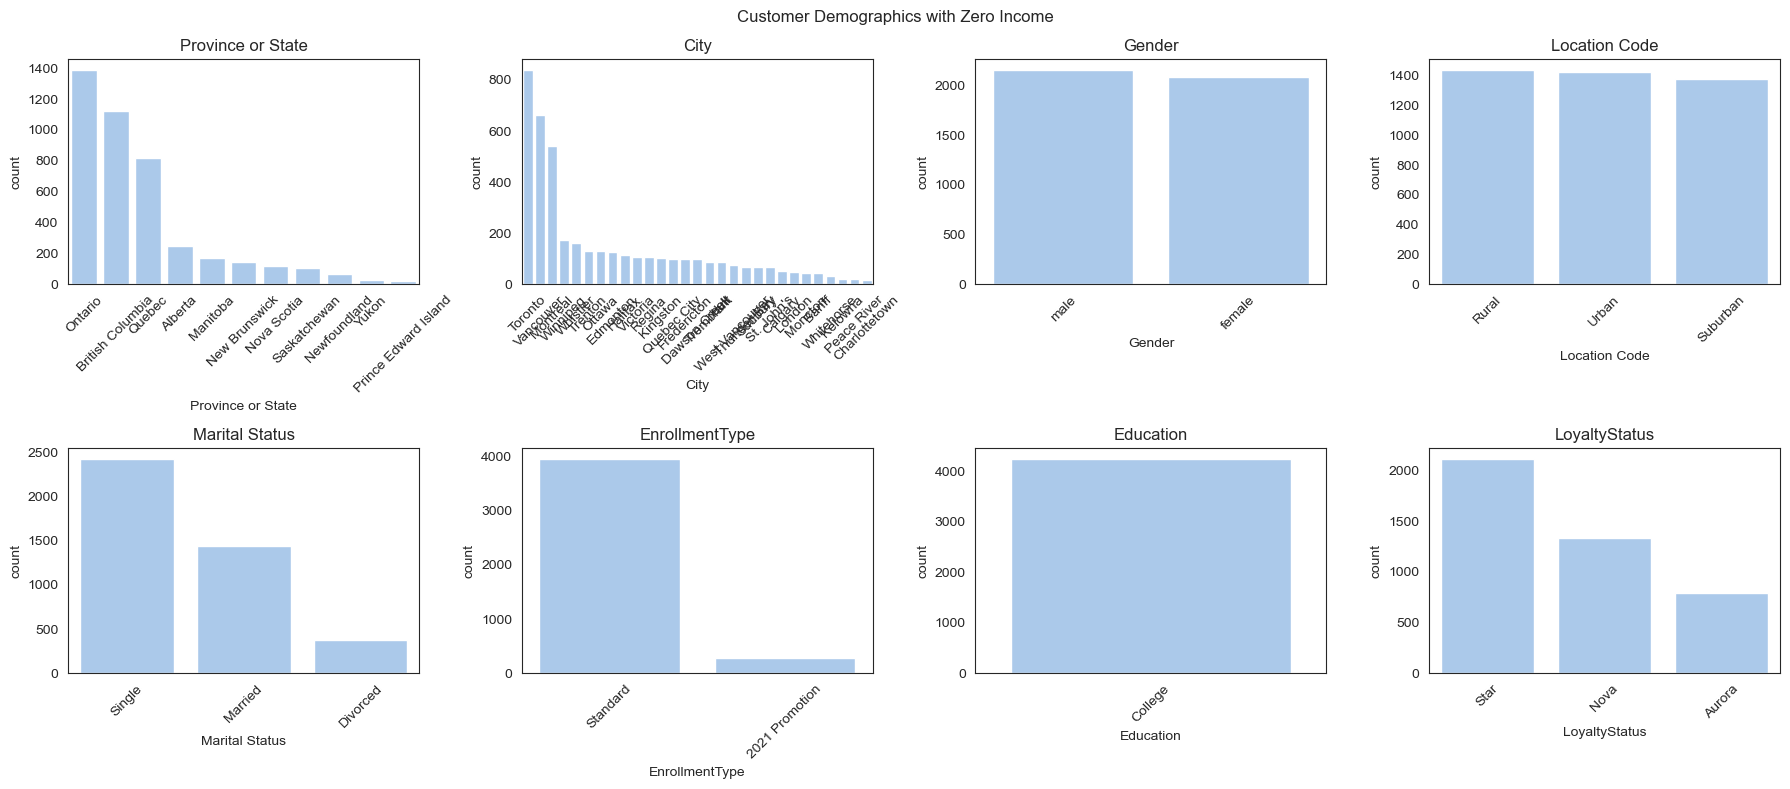

In [343]:
# Graphs to see what kind of customer has zero income
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
axes = axes.flatten()
for i, variable in enumerate(customer_nominal_variables + customer_ordinal_variables):
    sns.countplot(data=customerDB_copy[customerDB_copy['Income'] == 0], x=variable, order=customerDB_copy[customerDB_copy['Income'] == 0][variable].value_counts().index, ax=axes[i])
    axes[i].set_title(variable)
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle("Customer Demographics with Zero Income")
plt.tight_layout()
plt.show()

We can see here that `Education` is the variable where we only have one category with zero-income value. From a logical point of view, this makes sense, as people who are currently in college (apart from student-workers) don't have a fixed income. We'll replace the zero values with null.

In [344]:
# Just checking to see how many college-educated customers have non-zero and non-null income
is_college = customerDB_copy['Education'] == 'College'
college_count = is_college.sum()
college_zero_income_count = (is_college & (customerDB_copy['Income'] == 0)).sum()
college_null_income_count = (is_college & customerDB_copy['Income'].isna()).sum()
remaining_college_income_count = college_count - (college_zero_income_count + college_null_income_count)
print(remaining_college_income_count)

0


In [345]:
customerDB_copy.loc[customerDB_copy['Income'] == 0, 'Income'] = np.nan

##### Summary Statistics - Cleaned Income

In [346]:
customerDB_copy['Income'].describe()

count    12499.000000
mean     50549.620210
std      24249.732478
min      10037.000000
25%      28513.000000
50%      48263.000000
75%      70252.500000
max      99981.000000
Name: Income, dtype: float64

Based on the comparison between the mean and the 50th percentile (median), we can expect the distribution to not have many (or any) outliers. It might be slightly skewed to the right, but nothing very drastic.

#### Numerical Data

##### Histograms

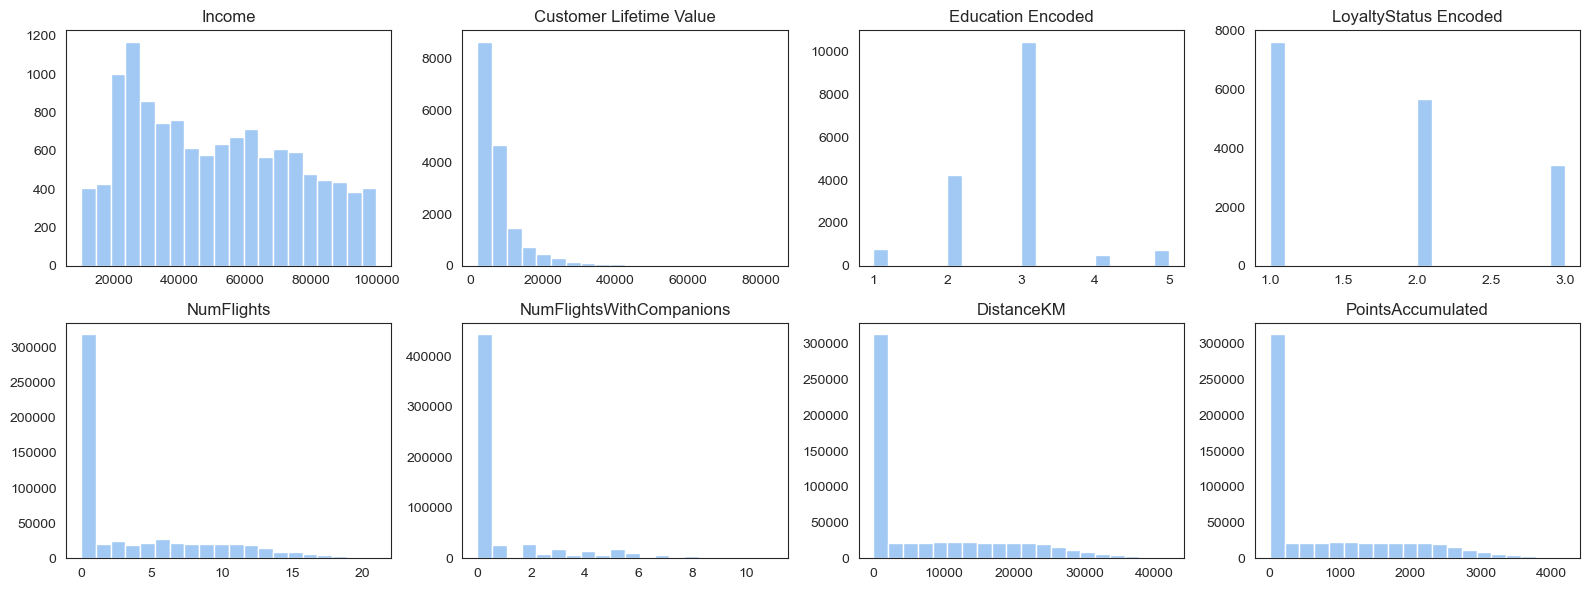

In [347]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
axes = axes.flatten()
for i, variable in enumerate(customer_numerical_variables + customer_ordinal_variables_encoded + flight_numerical_variables[:-1]):
    if variable in customer_numerical_variables or variable in customer_ordinal_variables_encoded:
        axes[i].hist(customerDB_copy[variable].dropna(), bins=20)
    else:
        axes[i].hist(flightDB_copy[variable].dropna(), bins=20)
    axes[i].set_title(variable)
plt.tight_layout()
plt.show()

**Customer DB**

- `Income`: The graph peaks around the mark of $20K–$60K yearly income, being somewhat skewed to the right, as expected from the summary statistics analysis. We can see there is a middle‑income customer base with a slightly smaller subset of high earners.
- `Customer Lifetime Value`: The distribution is highly right‑skewed, concentrated near lower CLV values and with a long right tail. Most customers contribute modestly to company value, while a limited group drives substantially higher returns.
- `Education Encoded`: The distribution is discrete, with a clear concentration around one category level (Bachelor). This suggests that most customers share a similar education background.
- `LoyaltyStatus Encoded`: The histogram shows a near‑uniform spread across loyalty tiers, though slightly denser at lower levels. This implies that the customer base is evenly distributed but leans slightly toward the low‑status tier.

**Flights DB**

While these distributions will give us a first look at the overall flight activity, they aren’t enough on their own to explain customer behavior or seasonal trends. To get meaningful insights, we’ll need to merge the flight data with the customer information and create aggregated features. These steps in the following phase will help us move from general distributions to deeper, time‑based and customer‑specific insights.

For now, we'll do a general analysis of the variables in the flights dataset.


- `NumFlights`: The distribution is heavily left‑skewed, with most customers registering zero or very few flights. This suggests a large proportion of infrequent or inactive travelers and a small fraction of frequent flyers.
- `NumFlightsWithCompanions`: A strong spike at zero indicates that most customers usually travel alone or not at all.
- `DistanceKM`: The histogram is right‑skewed, peaking at short‑distance flights with a gradual decline toward long‑distance travel. This suggests that local or domestic trips dominate, while international routes are less common.
- `PointsAccumulated`: Interestingly, the distributions of `DistanceKM` and `PointsAccumulated` look basically identical, differing only in scale. This suggests that the two variables are highly correlated. Customers who travel longer distances tend to accumulate more points. Because of this strong relationship, these features may carry redundant information, and it might make sense to drop one of them later in the analysis to reduce overlap.

##### Box Plots

Box plots are not ideal for discrete or ordinal variables because quartiles and whiskers don’t carry much meaning when the variable only takes a few distinct values. For this reason, we will not include `Education Encoded` and `LoyaltyStatus Encoded` in this visualisation.

Number of outliers in Income: 0
Number of outliers in Customer Lifetime Value: 1485
Number of outliers in NumFlights: 3389
Number of outliers in NumFlightsWithCompanions: 105021
Number of outliers in DistanceKM: 1911
Number of outliers in PointsAccumulated: 1914


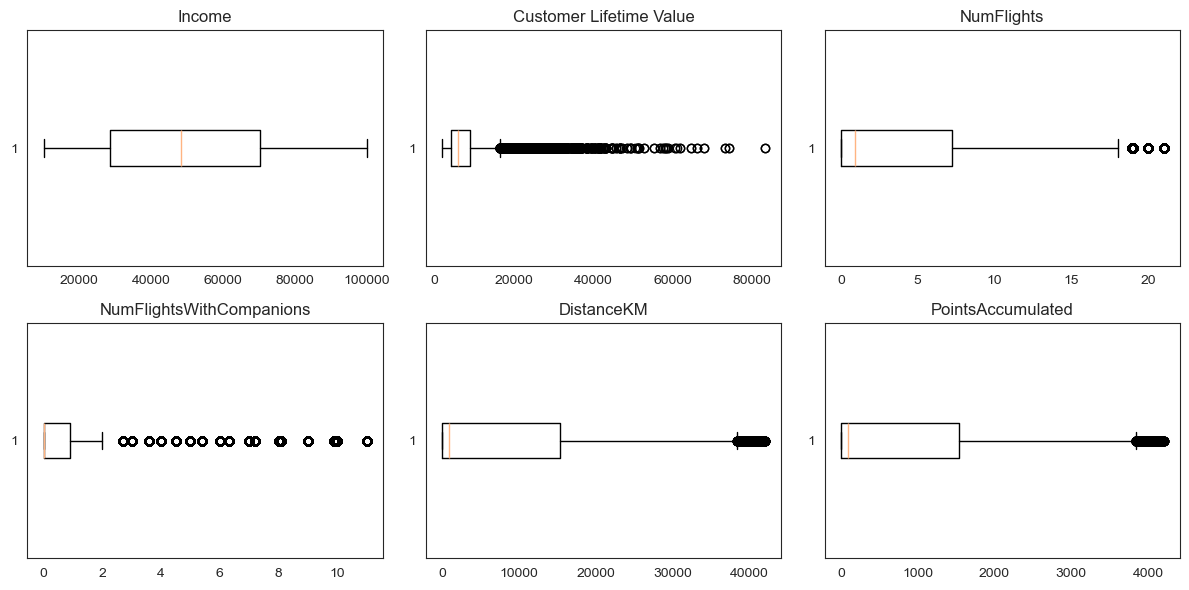

In [349]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()
for i, variable in enumerate(customer_numerical_variables + flight_numerical_variables[:-1]):
    
    if variable in customer_numerical_variables:
        used_df = customerDB_copy
    else:
        used_df = flightDB_copy
    
    axes[i].boxplot(used_df[variable].dropna(), vert=False)
    axes[i].set_title(variable)

    Q1 = used_df[variable].quantile(0.25)
    Q3 = used_df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = used_df[(used_df[variable] < lower_bound) |
                                   (used_df[variable] > upper_bound)]

    print(f"Number of outliers in {variable}:", outliers.shape[0])
plt.tight_layout()
plt.show()

**Customer DB**

- `Income`: The box plot confirms that most incomes cluster in the $20K–$60K range, with no visible outliers. The absence of extreme values suggests the income levels are relatively consistent among customers, reinforcing the idea of a mostly middle‑income population with limited variability.
- `Customer Lifetime Value`: The distribution shows a short box and a long upper whisker filled with outliers, confirming a heavily right‑skewed pattern. Only a handful of customers generate significantly higher lifetime value compared to the rest.

**Flights DB**

- `NumFlights`: The distribution features a moderate spread and a substantial number of outliers (~3,4K) above the upper whisker. This suggests that most customers take few flights per year, while a small portion of highly active travelers fly much more often than average.
- `NumFlightsWithCompanions`: The box plot shows a highly concentrated distribution with an extremely large number of outliers (~105K). At first glance, this suggests that most customers rarely travel with companions while a few do so very frequently. However, it’s important to note that this variable is a subset of NumFlights, so customers who didn’t fly at all will automatically appear with zero companion flights. Therefore, this heavy clustering at zero likely reflects both customers who travel alone and those who simply haven’t flown, rather than a true lack of companion travel among active flyers.
- `DistanceKM`: The plot has a clear right‑skewed shape, showing that while most customers travel shorter distances, a small subset takes very long-distance flights. These outliers probably correspond to premium or business travelers who contribute heavily to overall distance and value metrics.
- `PointsAccumulated`:  As expected, the distribution mirrors the shape of `DistanceKM`, with a long right tail and very similar proportional spread.

#### Categorical Data

##### Bar Plots

In [ ]:
# for categorical in customer (the ordinal ones as well)

#### Correlations

##### Numerical & Numerical Data

**Correlation Heatmap**

**Hexbin Maps** - Continuous & Continous

**Distributed (?) Box Plots** - Continuous & Discrete

##### Categorical & Categorical Data

**Stacked Bar Plots**

##### Numerical & Categorical Data

**Histogram w/ Colour Overlay**

### 5. <a id="4_5">Feature Engineering</a>

To use data on the customer level, we'll have to calculate the total and average values on the flight dataset since we currently have 36 rows (12 months for 3 years) for each customer.

#
***

## 5. <a id="5">Clustering</a>

***

## 6. <a id="6">Evaluation</a>

***

## 7. <a id="7">Suggestions</a>

***